In [52]:
# IMPORTS LIBRARY
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = os.listdir("./data/raw")
print(data)

['vauxhall.csv', 'bmw.csv', 'unclean cclass.csv', 'vw.csv', 'hyundi.csv', 'audi.csv', 'unclean focus.csv', 'toyota.csv', 'ford.csv', 'focus.csv', 'skoda.csv', 'cclass.csv', 'merc.csv']


In [54]:
for dataset in data:
  df = pd.read_csv('./data/raw/' + dataset)
  print(df.columns.to_list())

['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuel type', 'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax(£)', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuel type', 'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',

In [55]:
car = pd.DataFrame()
for dataset in data:
    path = "./data/raw/"+dataset
    if "unclean" not in dataset:
        df = pd.read_csv(path)
        df['brand'] = dataset.replace(".csv", "")
        car = pd.concat([car,df])

df = car

In [56]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4,vauxhall,NaN
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4,vauxhall,NaN
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4,vauxhall,NaN
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4,vauxhall,NaN
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4,vauxhall,NaN


In [57]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'brand', 'tax(£)'],
      dtype='object')

In [58]:
print(f'transmission: {df.transmission.unique()}')
print(f'fuelType: {df.fuelType.unique()}')

transmission: ['Manual' 'Automatic' 'Semi-Auto' 'Other']
fuelType: ['Petrol' 'Diesel' 'Other' 'Hybrid' 'Electric']


In [59]:
df = df.replace({
  'transmission' : {'Manual' : 0, 'Automatic' : 1, 'Semi-Auto' : 2, 'Other' : 3},
  'fuelType' : {'Petrol' : 0, 'Diesel' : 1, 'Hybrid' : 2, 'Electric' : 3, 'Other' : 4}
})

/var/folders/zj/3c2yfb953rb7s7d7rng5wtb00000gn/T/ipykernel_27214/797908040.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


In [60]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,Corsa,2018,7885,0,9876,0,145.0,55.4,1.4,vauxhall,NaN
1,Corsa,2019,11995,0,2500,0,145.0,54.3,1.4,vauxhall,NaN
2,Corsa,2017,9777,1,9625,0,145.0,47.9,1.4,vauxhall,NaN
3,Corsa,2016,8500,0,25796,0,30.0,55.4,1.4,vauxhall,NaN
4,Corsa,2019,10000,0,3887,0,145.0,43.5,1.4,vauxhall,NaN


# Deskripsi Dataset

Dataset ini berisi informasi mengenai berbagai atribut mobil yang digunakan untuk keperluan analisis harga mobil.

Tabel berikut menjelaskan kolom-kolom yang terdapat dalam dataset ini:

| Kolom        | Deskripsi                                                                 |
|--------------|---------------------------------------------------------------------------|
| model        | Model mobil                                                               |
| year         | Tahun pembuatan mobil                                                     |
| price        | Harga mobil dalam satuan mata uang tertentu                               |
| transmission | Jenis transmisi yang digunakan pada mobil                                 |
| mileage      | Jarak tempuh yang telah ditempuh oleh mobil dalam satuan mil              |
| fuelType     | Jenis bahan bakar yang digunakan pada mobil                               |
| tax          | Pajak tahunan yang harus dibayar untuk mobil                              |
| mpg          | Efisiensi bahan bakar dalam mil per galon                                  |
| engineSize   | Ukuran mesin mobil dalam liter                                            |
| brand        | Brand mobil                                                               |

<Axes: >

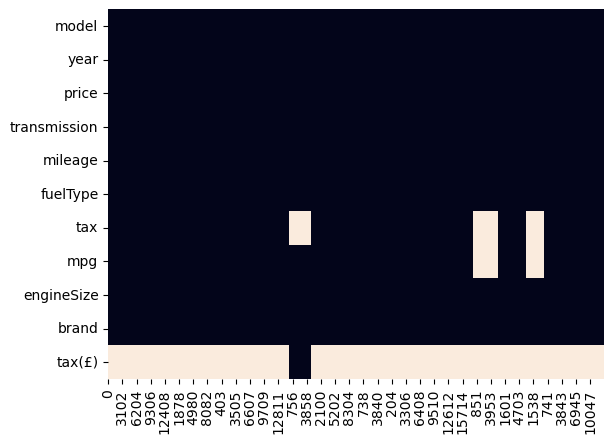

In [61]:
sns.heatmap(df.isna().transpose(), cbar=False)

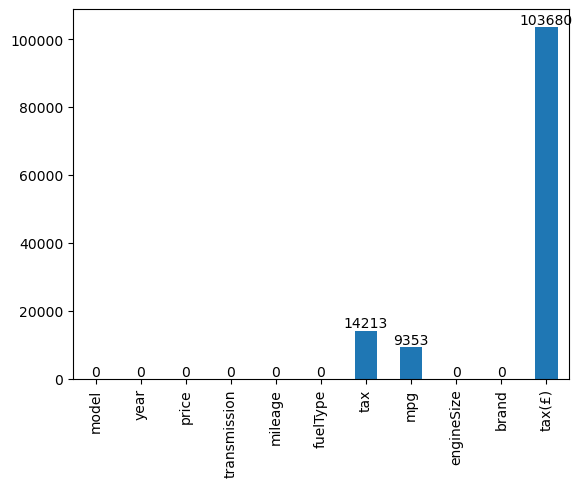

In [62]:
ax = df.isnull().sum().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

In [63]:
df.describe()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
count,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,94327.000000,99187.000000,108540.000000,4860.000000
mean,2017.098028,16890.124046,0.664778,23025.928469,0.485213,120.256183,55.166825,1.661644,121.147119
std,2.130057,9756.266820,0.826002,21176.423684,0.581022,63.404805,16.138522,0.557058,58.003289
min,1970.000000,450.000000,0.000000,1.000000,0.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,10229.500000,0.000000,7491.750000,0.000000,125.000000,47.100000,1.200000,125.000000
50%,2017.000000,14698.000000,0.000000,17265.000000,0.000000,145.000000,54.300000,1.600000,145.000000
75%,2019.000000,20940.000000,1.000000,32236.000000,1.000000,145.000000,62.800000,2.000000,145.000000
max,2060.000000,159999.000000,3.000000,323000.000000,4.000000,580.000000,470.800000,6.600000,555.000000


In [64]:
#check for duplicate
df.duplicated().sum()

2273

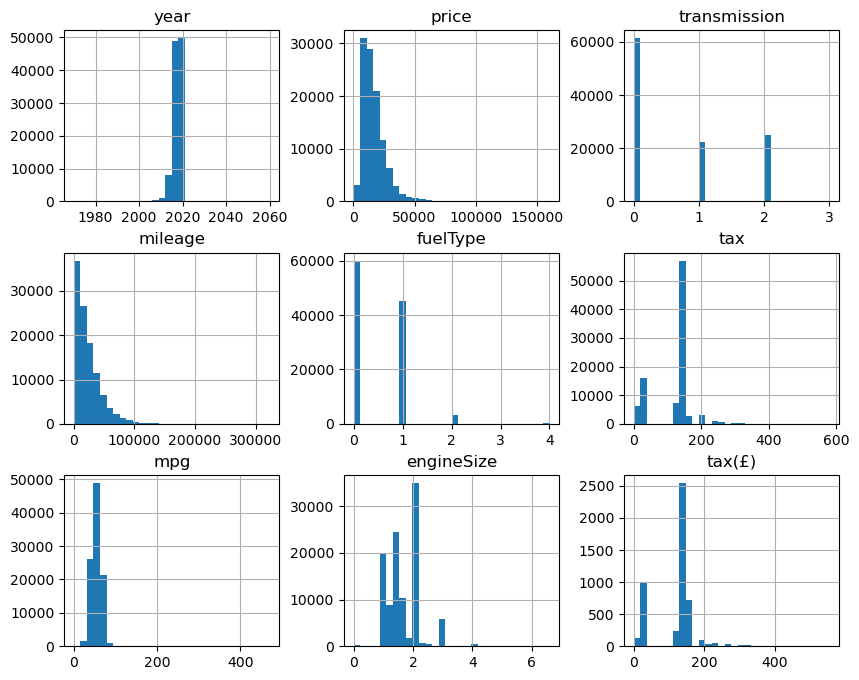

In [65]:
# Histogram untuk variabel numerik
df.hist(bins=30, figsize=(10, 8))
plt.show()

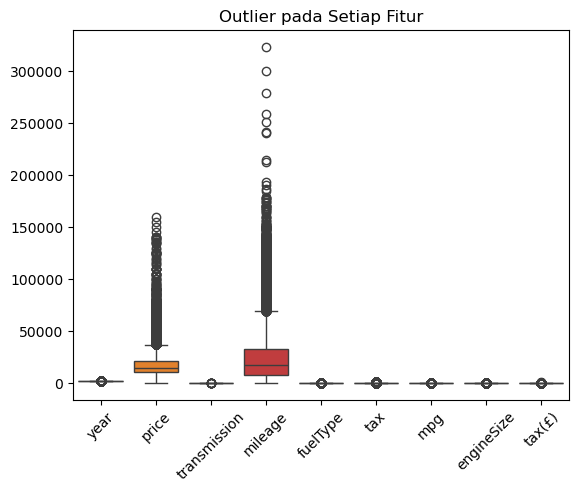

In [66]:
sns.boxplot(data=df)
plt.title('Outlier pada Setiap Fitur')
plt.xticks(rotation=45)
plt.show()

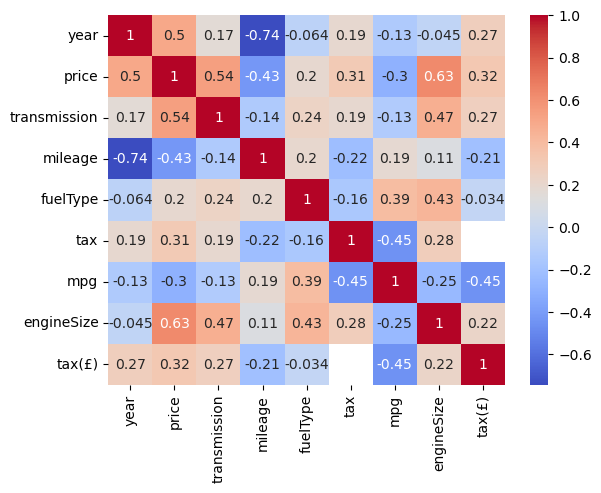

In [67]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Plot heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [68]:
# Drop kolom yang tidak diperlukan
car.drop('tax(£)', axis=1, inplace=True)

# Cleaning missing value dengan median
car[['tax','mpg']].fillna(df[['tax', 'mpg']].mean(), inplace=True)

# Hapus data duplikat
car.drop_duplicates(inplace=True)

# Simpan
car.to_csv('./data/preprocess/car.csv', index=False)

/var/folders/zj/3c2yfb953rb7s7d7rng5wtb00000gn/T/ipykernel_27214/2186471987.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car[['tax','mpg']].fillna(df[['tax', 'mpg']].mean(), inplace=True)
